Import of relevant modules

In [144]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)

Load of initial dataset

In [185]:
df= pd.read_csv('atp_data.csv')
#display of df to check for successful load
df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,Pouille L.,23,15,2.0,0.0,Completed,1.65,2.43,1.66,2.20,1835.901543,1842.459807,0.490563
44704,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,Donaldson J.,8,59,2.0,1.0,Completed,1.34,3.63,1.30,3.50,1843.576914,1647.967561,0.755103
44705,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,Zeballos H.,73,69,2.0,1.0,Completed,1.85,2.09,1.90,1.90,1588.293069,1619.758421,0.454841
44706,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,Anderson K.,9,8,2.0,0.0,Completed,1.52,2.75,1.50,2.62,1966.532849,1851.413609,0.659862


In [146]:
#check for missing values
df.isna().sum()

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank             0
LRank             0
Wsets           187
Lsets           187
Comment           0
PSW           11965
PSL           11965
B365W          5671
B365L          5651
elo_winner        0
elo_loser         0
proba_elo         0
dtype: int64

In [147]:
#display of info, again showing missing values but more importantly datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         44708 non-null  int64  
 1   Location    44708 non-null  object 
 2   Tournament  44708 non-null  object 
 3   Date        44708 non-null  object 
 4   Series      44708 non-null  object 
 5   Court       44708 non-null  object 
 6   Surface     44708 non-null  object 
 7   Round       44708 non-null  object 
 8   Best of     44708 non-null  int64  
 9   Winner      44708 non-null  object 
 10  Loser       44708 non-null  object 
 11  WRank       44708 non-null  int64  
 12  LRank       44708 non-null  int64  
 13  Wsets       44521 non-null  float64
 14  Lsets       44521 non-null  float64
 15  Comment     44708 non-null  object 
 16  PSW         32743 non-null  float64
 17  PSL         32743 non-null  float64
 18  B365W       39037 non-null  float64
 19  B365L       39057 non-nul

Pre-Processing and feature engineering

In [186]:
#creation of variables that show the difference in rank/elo from each players perspective
df['DiffRank_Winner'] = df['LRank']-df['WRank']
df['DiffRank_Loser'] = df['WRank']-df['LRank']
df['DiffElo_Winner'] = df['elo_loser']-df['elo_winner']
df['DiffElo_Loser'] = df['elo_winner']-df['elo_loser']

#creation of target variable
df['tar_val_Winner']=1
df['tar_val_Loser']=0

#creation of grand slam variable
df['grand_slam'] = df['Series'].apply(lambda x: 1 if x == 'Grand Slam'
                                       else 0)

In [188]:
#split of winner data into own dataset for further processing
#renaming variables to more code friendly syntax
df_winner = df.filter(['Tournament', 'Series', 'grand_slam', 'Surface', 
                       'Winner', 'WRank', 'DiffRank_Winner', 'B365W', 'elo_winner', 'DiffElo_Winner',
                       'tar_val_Winner'])
df_winner.rename(columns={'Winner': 'Player', 'WRank': 'Rank', 'DiffRank_Winner': 'DiffRank',
                          'B365W':'B365', 'elo_winner':'elo', 'DiffElo_Winner':'DiffElo', 'tar_val_Winner':'target_variable'}, inplace=True)
df_winner.head()

,Tournament,Series,grand_slam,Surface,Player,Rank,DiffRank,B365,elo,DiffElo,target_variable
0,Australian Hardcourt Championships,International,0,Hard,Dosedel S.,63,14,NaN,1500.0,0.0,1
1,Qatar Open,International,0,Hard,Kiefer N.,6,53,NaN,1500.0,0.0,1
2,Qatar Open,International,0,Hard,Gaudio G.,73,101,NaN,1500.0,0.0,1
3,Qatar Open,International,0,Hard,El Aynaoui Y.,33,45,NaN,1500.0,0.0,1
4,Qatar Open,International,0,Hard,Cherkasov A.,206,-171,NaN,1500.0,0.0,1


In [189]:
#split of loser data into own dataset for further processing
#renaming variables to more code friendly syntax
df_loser = df.filter(['Tournament', 'Series', 'grand_slam', 'Surface',
                      'Loser', 'LRank', 'DiffRank_Loser', 'B365L', 'elo_loser', 'DiffElo_Loser',
                      'tar_val_Loser'])
df_loser.rename(columns={'Loser': 'Player', 'LRank': 'Rank', 'DiffRank_Loser': 'DiffRank',
                         'B365L':'B365', 'elo_loser':'elo', 'DiffElo_Loser':'DiffElo', 'tar_val_Loser':'target_variable'}, inplace=True)
df_loser.head()

,Tournament,Series,grand_slam,Surface,Player,Rank,DiffRank,B365,elo,DiffElo,target_variable
0,Australian Hardcourt Championships,International,0,Hard,Ljubicic I.,77,-14,NaN,1500.0,0.0,0
1,Qatar Open,International,0,Hard,Tarango J.,59,-53,NaN,1500.0,0.0,0
2,Qatar Open,International,0,Hard,Luxa P.,174,-101,NaN,1500.0,0.0,0
3,Qatar Open,International,0,Hard,Dupuis A.,78,-45,NaN,1500.0,0.0,0
4,Qatar Open,International,0,Hard,Arazi H.,35,171,NaN,1500.0,0.0,0


In [190]:
#combining winner and loser data to create final dataset consisting match data from player perspective
df_final = pd.concat([df_winner, df_loser], ignore_index=True, sort=False)
df_final.rename(columns={'Tournament':'tournament',
                         'Series':'series','Surface':'surface',
                         'Player':'player', 'Rank':'rank', 'DiffRank':'diff_rank',
                         'DiffElo':'diff_elo'}, inplace=True)
df_final.head(10)

,tournament,series,grand_slam,surface,player,rank,diff_rank,B365,elo,diff_elo,target_variable
0,Australian Hardcourt Championships,International,0,Hard,Dosedel S.,63,14,NaN,1500.0,0.0,1
1,Qatar Open,International,0,Hard,Kiefer N.,6,53,NaN,1500.0,0.0,1
2,Qatar Open,International,0,Hard,Gaudio G.,73,101,NaN,1500.0,0.0,1
3,Qatar Open,International,0,Hard,El Aynaoui Y.,33,45,NaN,1500.0,0.0,1
4,Qatar Open,International,0,Hard,Cherkasov A.,206,-171,NaN,1500.0,0.0,1
5,Qatar Open,International,0,Hard,Caratti C.,211,8,NaN,1500.0,0.0,1
6,Qatar Open,International,0,Hard,Berasategui A.,60,1940,NaN,1500.0,0.0,1
7,Qatar Open,International,0,Hard,Bastl G.,85,-49,NaN,1500.0,0.0,1
8,Gold Flake Open,International,0,Hard,Hantschk M.,128,-114,NaN,1500.0,0.0,1
9,Gold Flake Open,International,0,Hard,Golmard J.,38,66,NaN,1500.0,0.0,1


In [152]:
#checking final dataset for missing values
display(df_final.isna().sum())

df_final.describe()

tournament             0
series                 0
grand_slam             0
surface                0
player                 0
rank                   0
diff_rank              0
B365               11322
elo                    0
diff_elo               0
target_variable        0
dtype: int64

,grand_slam,rank,diff_rank,B365,elo,diff_elo,target_variable
count,89416.000000,89416.000000,89416.00000,78094.000000,89416.000000,8.941600e+04,89416.000000
mean,0.184643,76.416894,0.00000,2.686848,1646.389416,5.207807e-15,0.500000
std,0.388010,104.461638,142.71112,2.735366,164.303627,1.931425e+02,0.500003
min,0.000000,0.000000,-1991.00000,1.000000,1318.945207,-9.419087e+02,0.000000
25%,0.000000,24.000000,-41.00000,1.380000,1519.497837,-1.148591e+02,0.000000
50%,0.000000,53.000000,0.00000,1.830000,1615.703895,0.000000e+00,0.500000
75%,0.000000,92.000000,41.00000,2.870000,1732.713699,1.148591e+02,1.000000
max,1.000000,2000.000000,1991.00000,101.000000,2392.595567,9.419087e+02,1.000000


In [191]:
#fillinf missing values with zero
df_final['B365'].fillna(0, inplace=True)

Visualization and Statistics

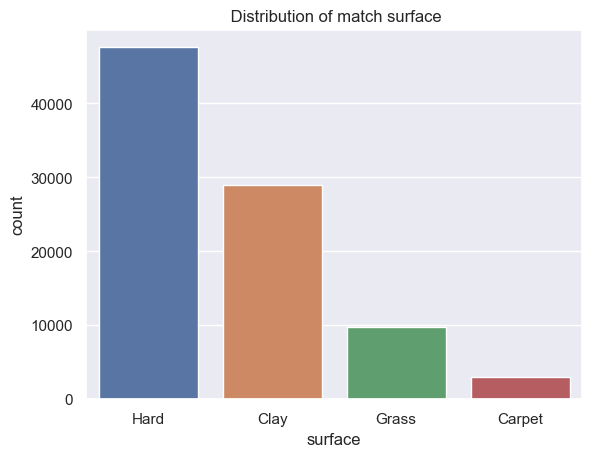

In [192]:
# number of contents belonging to surface
sns.countplot(x = 'surface', data = df_final);
plt.title(' Distribution of match surface');

C:\Users\schle\AppData\Local\Temp\ipykernel_5752\3221027915.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_final.corr()


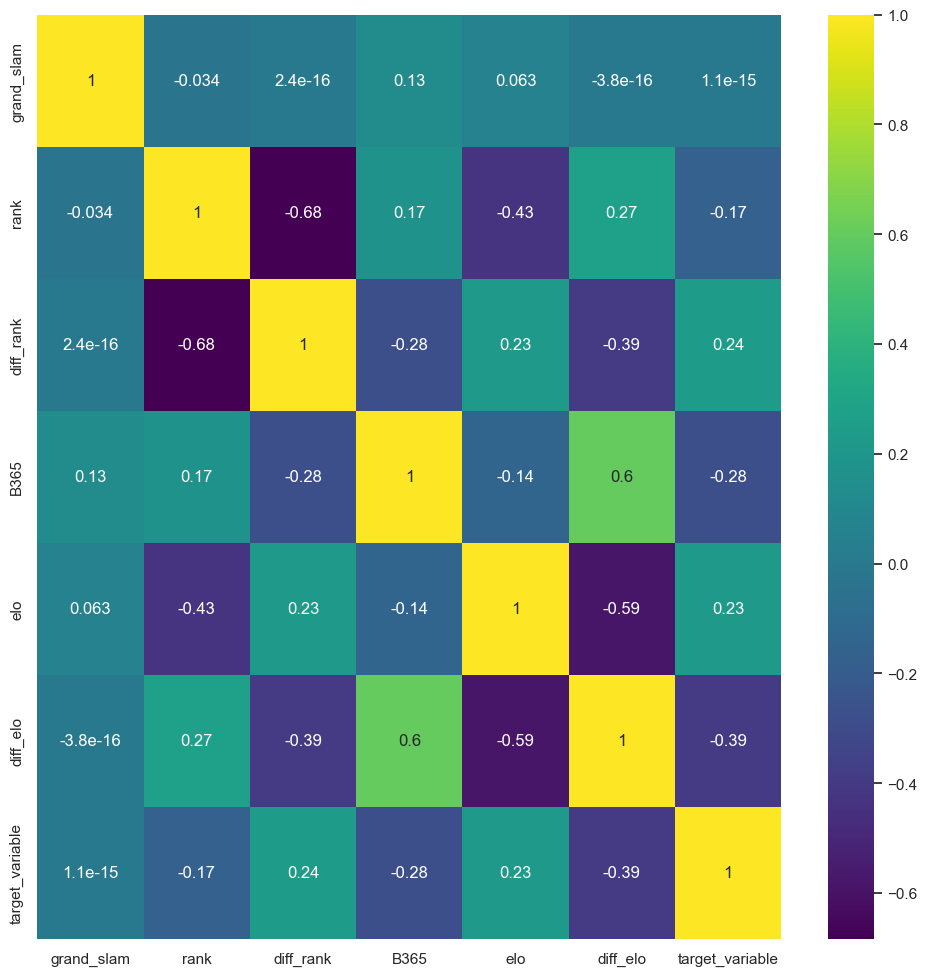

In [216]:
# exploring the correlation between the winning and losing ranks
# using the heatmap method 
cor = df_final.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, cmap= 'viridis');

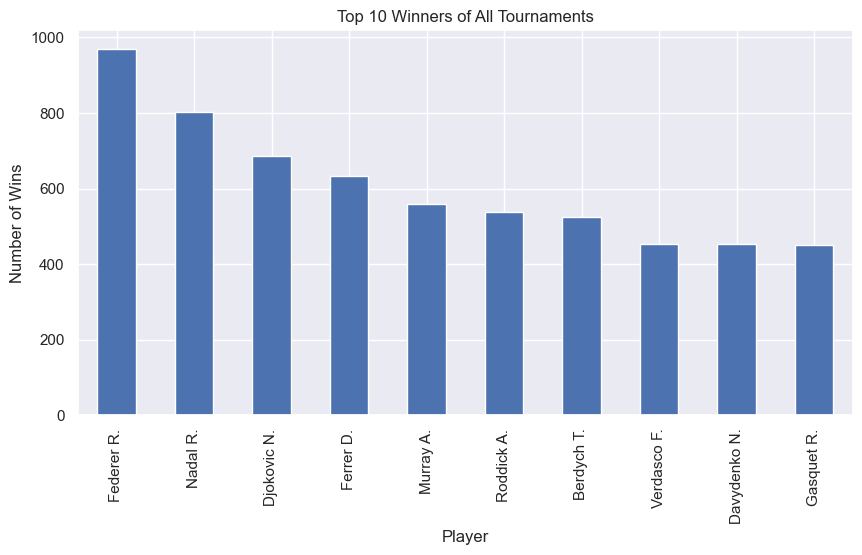

In [194]:
# Filter the players who are winners
winners = df_final[df_final['target_variable'] == 1]

# Count the number of wins for each player
win_counts = winners['player'].value_counts()

# Get the top 10 winners
top_winners = win_counts.nlargest(10)

# Plot the top 10 winners
plt.figure(figsize=(10,5))
top_winners.plot(kind='bar')
plt.title('Top 10 Winners of All Tournaments')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.show();

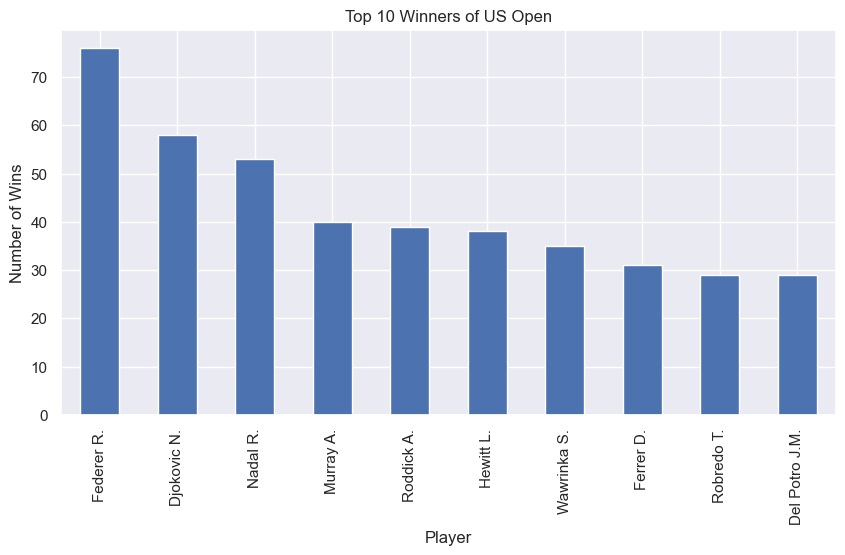

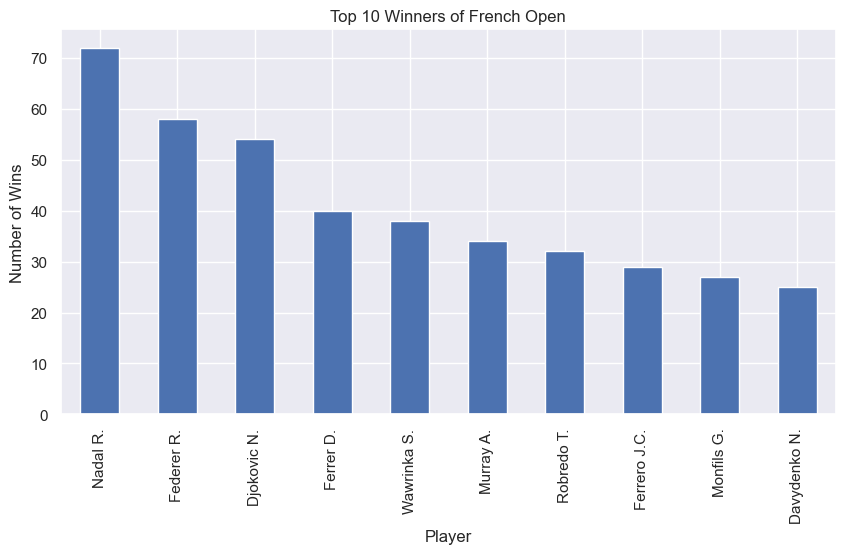

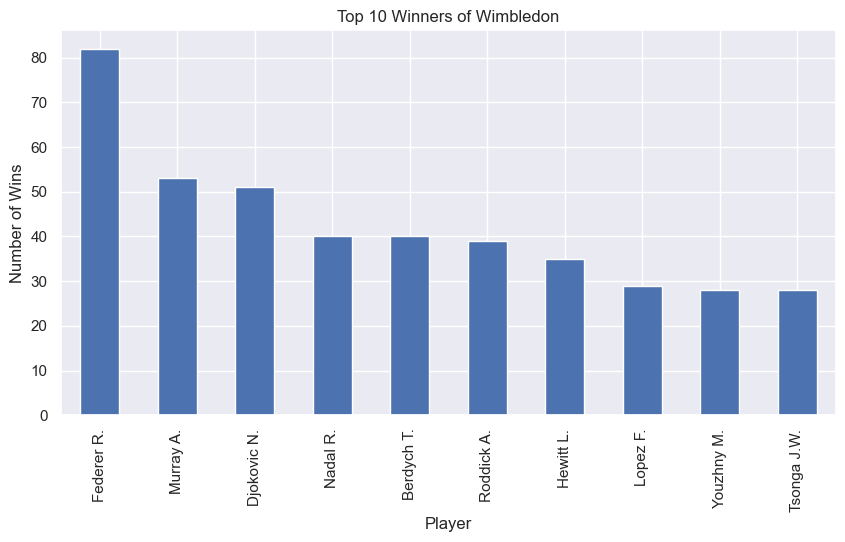

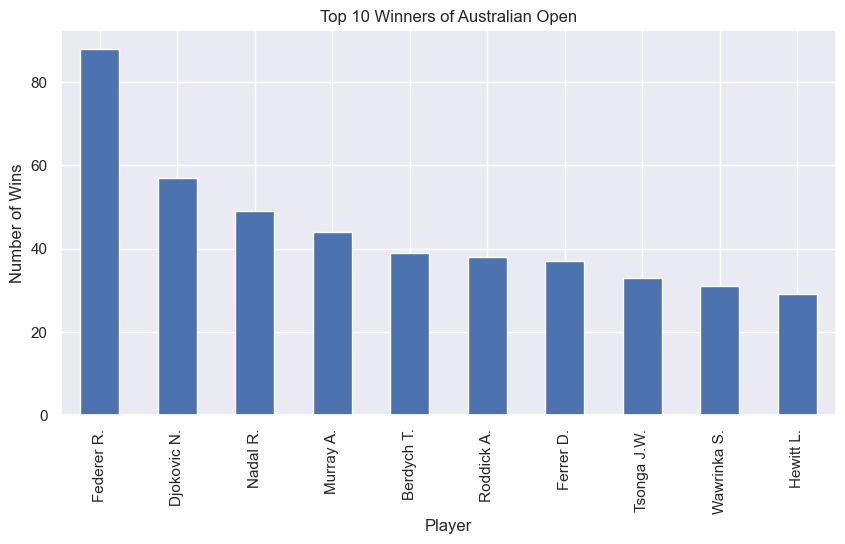

In [195]:
# For each grand slam, get the top 10 players
winners = df_final[df_final['target_variable'] == 1]


grand_slams = ['US Open', 'French Open', 'Wimbledon', 'Australian Open']
for gs in grand_slams:
    gs_winners = winners[winners['tournament'] == gs]
    win_counts = gs_winners['player'].value_counts()
    top_winners = win_counts.nlargest(10)

    # Plot the top 10 winners
    plt.figure(figsize=(10,5))
    top_winners.plot(kind='bar')
    plt.title(f'Top 10 Winners of {gs}')
    plt.xlabel('Player')
    plt.ylabel('Number of Wins')
    plt.show();

C:\Users\schle\AppData\Local\Temp\ipykernel_5752\148148521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_players['grand_slams'] = df_final['tournament'].apply(lambda x: 'US Open' if x == 'US Open'


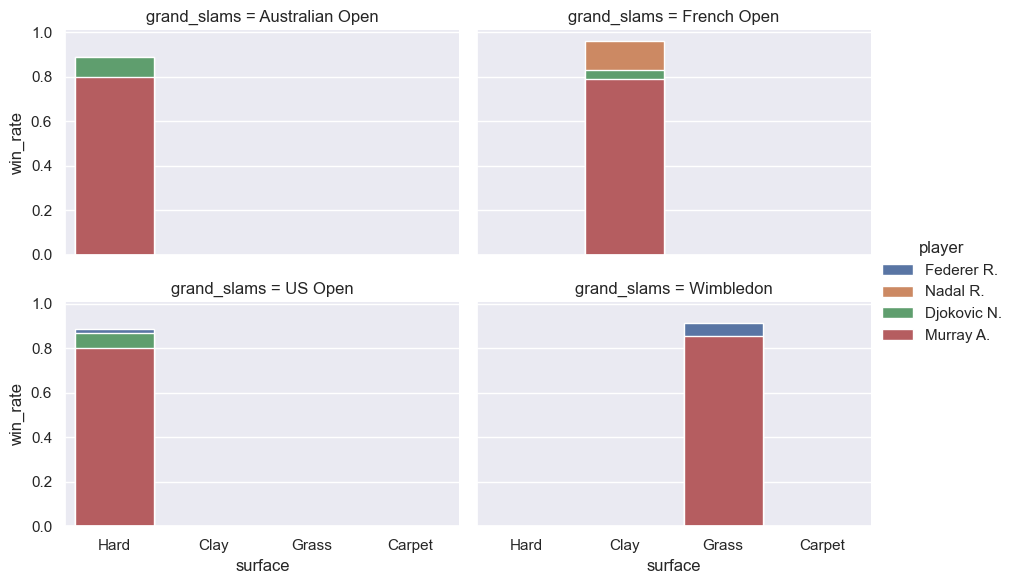

In [217]:
# Filter top 5 players in each grand_slam
df_top_players = df_final[df_final['grand_slam'] == 1]

df_top_players['grand_slams'] = df_final['tournament'].apply(lambda x: 'US Open' if x == 'US Open'
                                          else ('French Open' if x == 'French Open'
                                                else ('Wimbledon' if x == 'Wimbledon'
                                                      else ('Australian Open'))))

top_players = df_top_players.groupby('grand_slams')['player'].value_counts().groupby('grand_slams').nlargest(3).reset_index(level=0, drop=True).index.get_level_values('player').unique()

df_top_players = df_top_players[df_top_players['player'].isin(top_players)].copy()

# Calculate win rate
df_top_players.loc[:, 'win_rate'] = df_top_players.groupby(['player', 'grand_slams', 'surface'])['target_variable'].transform('mean')

# Remove duplicate rows
df_top_players = df_top_players.drop_duplicates(subset=['player', 'grand_slams', 'surface'])

# Create a FacetGrid object
g = sns.FacetGrid(df_top_players, col="grand_slams", hue="player", col_wrap=2, height=3, aspect=1.5)

# Map the bar plot to each facet
g.map(sns.barplot, "surface", "win_rate", order=["Hard", "Clay", "Grass", "Carpet"])

# Add a legend
g.add_legend()

plt.show();

Predictive Modeling and Forecasting

Train / Test Split

In [159]:
#Splitting data into train and test sets
X = df_final.drop('target_variable', axis=1)
y = df_final['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

print("Train Set:", X_train.shape)
print("Test Set:", X_test.shape)

Train Set: (71532, 10)
Test Set: (17884, 10)


In [160]:
#control for if training set has missing values
display(X_train.isna().sum())

tournament    0
series        0
grand_slam    0
surface       0
player        0
rank          0
diff_rank     0
B365          0
elo           0
diff_elo      0
dtype: int64

Encoding variables

In [161]:
#Label Encoding for ordinal columns:
#One Hot Encoding for non-ordinal columns:

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# series and surface are ordinal categorical variable: replace categories with numbers and ordered by importance(series) or occurance(surface)
X_train['series'] = X_train['series'].replace(['Grand Slam', 'Masters Cup', 'Masters',  'Masters 1000', 'ATP500', 'ATP250',
                                               'International Gold', 'International'], [0, 1, 2, 3, 4, 5, 6, 7])

X_train['surface'] = X_train['surface'].replace(['Hard', 'Clay', 'Grass','Carpet'], [0, 1, 2, 3])

# Position is a nominal categorical variable, it is preferable to use one-hot-encoding
X_train = pd.get_dummies(X_train)

# Apply SAME transformations to the testing set
X_test['series'] = X_test['series'].replace(['Grand Slam', 'Masters Cup', 'Masters',  'Masters 1000', 'ATP500', 'ATP250',
                                               'International Gold', 'International'], [0, 1, 2, 3, 4, 5, 6, 7])

X_test['surface'] = X_test['surface'].replace(['Hard', 'Clay', 'Grass','Carpet'], [0, 1, 2, 3])

X_test = pd.get_dummies(X_test)

In [162]:
#display X_Train for successfull encoding check
X_train

series  grand_slam  surface  rank  diff_rank   B365          elo  \
0           5           0        0    26         48  1.300  1755.665119   
1           0           1        1    40        -13  4.000  1592.070713   
2           0           1        1    26         54  1.444  1619.533873   
3           3           0        0    39         -9  2.620  1777.507654   
4           4           0        0    96          5  2.370  1468.326770   
...       ...         ...      ...   ...        ...    ...          ...   
71527       0           1        0    83         11  2.500  1543.892076   
71528       5           0        0    42         75  1.440  1690.853105   
71529       7           0        1    77         -6  1.667  1562.815359   
71530       7           0        0    42        109  0.000  1537.471207   
71531       7           0        2    76        -55  1.500  1703.260480   

         diff_elo  tournament_AAPT Championships  \
0     -247.457331                              0   
1       51.947431                              0   
2     -128.167092                              0   
3      -37.902674                              0   
4       53.438859                              0   
...           ...                            ...   
71527 -159.738282                              0   
71528 -149.159019                              0   
71529 -127.592904                              0   
71530   26.556451                              0   
71531  165.483050                              0   

       tournament_ABN AMRO World Tennis Tournament  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
71527                                            0   
71528                                            0   
71529                                            0   
71530                                            0   
71531                                            0   

       tournament_AEGON Championships  tournament_AEGON International  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
...                               ...                             ...   
71527                               0                               0   
71528                               0                               0   
71529                               0                               0   
71530                               0                               0   
71531                               0                               0   

       tournament_AEGON Open  tournament_AIG Japan Open Tennis Championships  \
0                          0                                               0   
1                          0                                               0   
2                          0                                               0   
3                          0                                               0   
4                          0                                               0   
...                      ...                                             ...   
71527                      0                                               0   
71528                      0                                               0   
71529                      0                                               0   
71530                      0                                               0   
71531                      0                                               

C:\Users\schle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: -0.03295
Feature: 1, Score: -0.15136
Feature: 2, Score: -0.04334
Feature: 3, Score: 0.00074
Feature: 4, Score: -0.22136
Feature: 5, Score: 0.00058
Feature: 6, Score: -0.00277
Feature: 7, Score: -0.06004
Feature: 8, Score: 0.00384
Feature: 9, Score: 0.05467
Feature: 10, Score: 0.03553
Feature: 11, Score: 0.06241
Feature: 12, Score: 0.05024
Feature: 13, Score: 0.03344
Feature: 14, Score: -0.00983
Feature: 15, Score: -0.01604
Feature: 16, Score: -0.00516
Feature: 17, Score: -0.02597
Feature: 18, Score: -0.05036
Feature: 19, Score: -0.01983
Feature: 20, Score: 0.08583
Feature: 21, Score: -0.00767
Feature: 22, Score: -0.01045
Feature: 23, Score: 0.00922
Feature: 24, Score: 0.01501
Feature: 25, Score: -0.03332
Feature: 26, Score: -0.18013
Feature: 27, Score: 0.01719
Feature: 28, Score: 0.00560
Feature: 29, Score: 0.07387
Feature: 30, Score: 0.04389
Feature: 31, Score: -0.13803
Feature: 32, Score: -0.00374
Feature: 33, Score: 0.06546
Feature: 34, Score: 0.01966
Feature: 35,

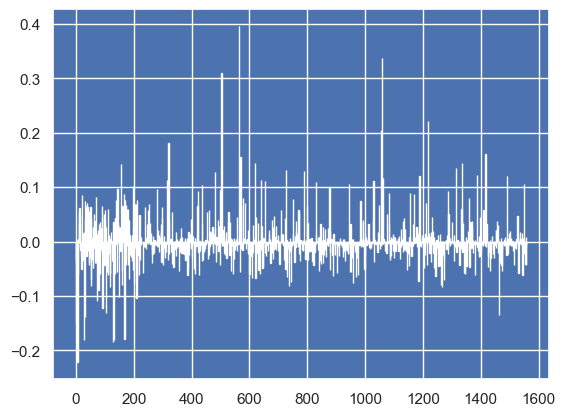

In [230]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]

importance2 = [importance[x] for x in range(len(importance)) if x != 4]

# summarize feature importance
for i,v in enumerate(importance2):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
ax = plt.axes()
ax.set_facecolor('#4c72b0')
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [231]:
col564 = X_train.iloc[:,565]
#Federer
col5 = X_train.iloc[:,5]
col1054 = X_train.iloc[:,1054]
col1059 = X_train.iloc[:,1059]
col1218 = X_train.iloc[:,1218]
col503 = X_train.iloc[:,503]

print(col5.head(1))
print(col503.head(1))
print(col564.head(1))
print(col1054.head(1))
print(col1059.head(1))
print(col1218.head(1))


#Apart from B365, the world best ranked players have the highest impact on our model, as should be expected. If one of the players is one of these legends, the chance
#that said player is going to win is very high.

0    1.3
Name: B365, dtype: float64
0    0
Name: player_Djokovic N., dtype: uint8
0    0
Name: player_Federer R., dtype: uint8
0    0
Name: player_Murray A., dtype: uint8
0    0
Name: player_Nadal R., dtype: uint8
0    0
Name: player_Roddick A., dtype: uint8


Feature Scaling

In [165]:
#applying feature scalling according to what we learned in the course
missing_columns = X_train.columns.difference(X_test.columns)
missing_data = pd.DataFrame(0, index=X_test.index, columns=missing_columns)
X_test = pd.concat([X_test, missing_data], axis=1)

X_test = X_test[X_train.columns]

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Modelling

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#running logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Accuracy score of the Logistic Regression Model : ",
      lr.score(X_test, y_test))

#running decision tree classifier model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Accuracy score of the Decision Tree Model : ",
      dt.score(X_test, y_test))

#running random forest classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy score of the Random Forest Model : ",
      rf.score(X_test, y_test))

#all scores are printed for comparison of accuracy

Accuracy score of the Logistic Regression Model :  0.6723328114515769
Accuracy score of the Decision Tree Model :  0.6132297025273988
Accuracy score of the Random Forest Model :  0.6765265041377768


In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#running additional models

#running knn classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Accuracy score of the K Neighbors Classifier : ", knn.score(X_test, y_test))

#running svc
svm = SVC()
svm.fit(X_train, y_train)
print("Accuracy score of the Support Vector Machine : ", svm.score(X_test, y_test))

#running xgb classifier, as advised by our coach
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("Accuracy score of the XGB Classifier : ", xgb.score(X_test, y_test))

#all scores are printed for comparison of accuracy

Accuracy score of the K Neighbors Classifier :  0.6250279579512413
Accuracy score of the Support Vector Machine :  0.6699843435473049
Accuracy score of the XGB Classifier :  0.6929098635651979


Optimasation of Hyperparameters

Optimisation of Random Forest

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=123)
parameters = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}
grid_rf = GridSearchCV(estimator=rf, param_grid=parameters, error_score='raise', cv=3, n_jobs=-1)

grid_rf.fit(X_train[:1000], y_train[:1000])
print("Best parameters: {}".format(grid_rf.best_params_))
print("Random forest score: {}".format(grid_rf.score(X_test, y_test)))

y_pred_rf = grid_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

pd.crosstab(y_test, y_pred_rf, rownames=['True Class'], colnames=['Predicted by RF'])

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random forest score: 0.6745135316484008
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      8999
           1       0.66      0.72      0.69      8885

    accuracy                           0.67     17884
   macro avg       0.68      0.67      0.67     17884
weighted avg       0.68      0.67      0.67     17884



Predicted by RF,0,1
True Class,,
0,5653,3346
1,2475,6410


Optimisation of Logistic Regression

In [169]:
lr = LogisticRegression(random_state=123, C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                        penalty='l2', solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lr = GridSearchCV(estimator=lr, param_grid=parameters, error_score='raise', cv=3, n_jobs=-1)

grid_lr.fit(X_train[:1000], y_train[:1000])
print("Best parameters: {}".format(grid_lr.best_params_))
print("Logistic Regression score: {}".format(grid_lr.score(X_test, y_test)))

y_pred_lr = grid_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

pd.crosstab(y_test, y_pred_lr, rownames=['True Class'], colnames=['Predicted by LR'])


C:\Users\schle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters: {'C': 0.01}
Logistic Regression score: 0.6687541936926862
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      8999
           1       0.64      0.75      0.69      8885

    accuracy                           0.67     17884
   macro avg       0.67      0.67      0.67     17884
weighted avg       0.67      0.67      0.67     17884



Predicted by LR,0,1
True Class,,
0,5312,3687
1,2237,6648


Optimisation of XGB

In [170]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

y_pred_xgb = grid_search.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

pd.crosstab(y_test, y_pred_xgb, rownames=['True Class'], colnames=['Predicted by XGB'])

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 7, 'subsample': 0.5}
Best score:  0.6936475768119343
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      8999
           1       0.69      0.70      0.69      8885

    accuracy                           0.69     17884
   macro avg       0.69      0.69      0.69     17884
weighted avg       0.69      0.69      0.69     17884



Predicted by XGB,0,1
True Class,,
0,6159,2840
1,2647,6238
